# Assignment #1 - Basic Data Exploration, Visualization, and Analysis

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Grading

This assignment will be graded in two portions:
<ul>
<li> 50% - Correctness and functionality. Parts of the assignment (the functions you are asked to write) will be graded on whether they work correctly and generate correct answers. </li>
<li> 50% -Analysis and presentation. Parts of the assignment (the markdown cells you are asked to fill in) will be graded on whether they present the answers clearly, and whether the analysis is correct. </li>
</ul>

## Load Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from asn1_function_sheet import age_splitter, cohortCompare, effectSizer

try:
    df = pd.read_csv("LabourTrainingEvaluationData.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/LabourTrainingEvaluationData.csv")
df["Nodeg"].astype('category', copy=False)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [15]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Part 1

<ol>
<li> Create a function called age_splitter that takes a dataframe, a column name, and an age threshold as input. The function should return two dataframes, one with all the rows where the age in the specified column is below the threshold, and one with all the rows where the age in the specified column is above or equal to the threshold. </li>
<li> Use this function to calculate the percentage of people in the dataset that are below 30 years old. </li>
<li> Use this function to compare the 1978 earnings of the two groups to see which is larger - show this arithmatically as well as visually. </li>
</ol>

In [17]:
# 1 - Demo of function

df_below, df_above_equal = age_splitter(df,"Age",30)
print("DataFrame - Under 30 Years Old:\n", df_below.head(3))
print("\nDataFrame - 30 Years or Older:\n", df_above_equal.head(3))

DataFrame - Under 30 Years Old:
    Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
1   21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
4   18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
5   22  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
1       3175.971       5852.565      13496.080  
4       1669.295      10727.610       9860.869  
5      16365.760      18449.270      25564.670  

DataFrame - 30 Years or Older:
    Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
0   45  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
2   38          HighSchool  NotBlack  NotHispanic       Married      0   
3   48  LessThanHighSchool  NotBlack  NotHispanic       Married      1   

   Earnings_1974  Earnings_1975  Earnings_1978  
0       21516.67       25243.55       25564.67  
2       23039.02       25130.76       25564.67

In [18]:
# 2 Percentage Under 30

under_30 = "{:.2%}".format(df_below['Age'].count() / df['Age'].count())
print("\nPercentage Under 30 Years Old:", under_30)


Percentage Under 30 Years Old: 44.72%


In [19]:
# 3 - 1978 Earnings Comparison
# Use this function to compare the 1978 earnings of the two groups to see which is larger - show this arithmatically as well as visually.

earn_below = df_below.groupby(df_below['Age'])['Earnings_1978'].mean()                 # Calculate average income by age (creates series)
df_earn_below = earn_below.to_frame().reset_index()                                    # Convert back to dataframe

earn_above = df_above_equal.groupby(df_above_equal['Age'])['Earnings_1978'].mean()
df_earn_above = earn_above.to_frame().reset_index()
#df_earn_above.head()
#print("\nAverage Earnings of Those Under 30:\n", earn_below)
#print("\nAverage Earnings of Those 30 and Older:\n", earn_above)
df_earn_below.head()

# INCOMPLETE

,Age,Earnings_1978
0,16,6062.281453
1,17,7514.220858
2,18,8230.561426
3,19,9995.940127
4,20,11092.492947


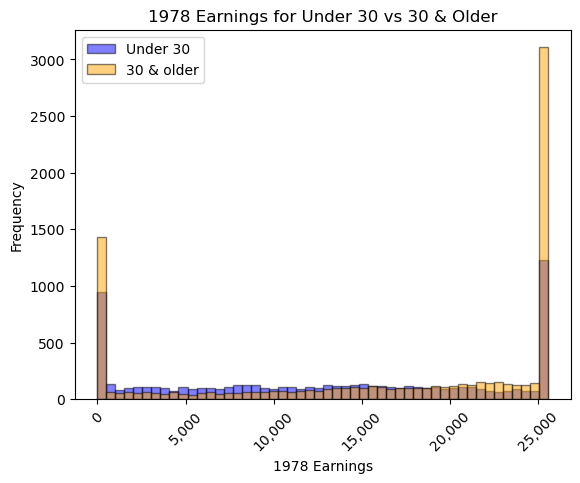

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

fig, ax = plt.subplots()

# Plot histograms overlaid
ax.hist(df_below['Earnings_1978'], bins=50, alpha=0.5, label='Under 30', color='blue', edgecolor='black')    # Note: alpha=0.5 makes the bars semi
ax.hist(df_above_equal['Earnings_1978'], bins=50, alpha=0.5, label='30 & older', color='orange', edgecolor='black')

ax.set_title('1978 Earnings for Under 30 vs 30 & Older')
ax.set_xlabel('1978 Earnings')
ax.set_ylabel('Frequency')
ax.legend()
plt.xticks(rotation=45)

formatter = tk.StrMethodFormatter('{x:,.0f}')  # Format as an integer with comma
ax.xaxis.set_major_formatter(formatter)                                  

plt.show()

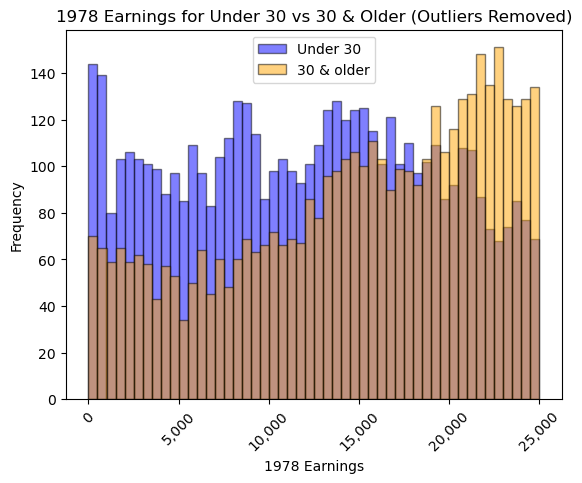

In [21]:
fig, ax = plt.subplots()

df_below_filt = df_below[(df_below['Earnings_1978'] > 0) & (df_below['Earnings_1978'] < 25000)]
df_above_filt = df_above_equal[(df_above_equal['Earnings_1978'] > 0) & (df_above_equal['Earnings_1978'] < 25000)]

# Plot histograms overlaid
ax.hist(df_below_filt['Earnings_1978'], bins=50, alpha=0.5, label='Under 30', color='blue', edgecolor='black')    # Note: alpha=0.5 makes the bars semi
ax.hist(df_above_filt['Earnings_1978'], bins=50, alpha=0.5, label='30 & older', color='orange', edgecolor='black')

ax.set_title('1978 Earnings for Under 30 vs 30 & Older (Outliers Removed)')
ax.set_xlabel('1978 Earnings')
ax.set_ylabel('Frequency')
ax.legend()
plt.xticks(rotation=45)

formatter = tk.StrMethodFormatter('{x:,.0f}')  # Format as an integer with comma
ax.xaxis.set_major_formatter(formatter)                                  

plt.show()

### Part 2

<ol>
<li>Create a function in the .py file called cohortCompare that takes two arguments - a dataframe and a list of categorical column names. The function should return a dictonary of the key statistics of each numerical columns and counts for categorical columns.</li>
    <ul>
    <li> Mean, Median, Standard Deviation, Min, Max for numerical columns </li>
    <li> Counts for categorical columns </li>
    <li><b>Note:</b> Please use the CohortMetric object to store and manage the statistics for each cohort.</li>
    </ul>
<li> Does this data, at a high level, appear to be representative of the general population of the US in the late 70s? Does it now? Why or why not? </li>
    <ul>
    <li> This does not need to be a long answer or done in increadable depth. This question will generate some demographic profiles of people in the data - does that appear to be similar to the US population at the time? </li>
    <li> Please state how you assessd this. (There isn't one correct answer, the process is more important than the answer) </li>
    </ul>
<li>Print the dictionary returned in a nice-ish way. (Don't go crazy, basic formatting)</li>
</ol>

In [22]:
# 1 - Demo of function / print the dictionary
cohorts = df.columns
cohort_stats = cohortCompare(df, cohorts, statistics=['mean', 'median', 'std', 'min', 'max'])
cohort_stats_df = pd.DataFrame(cohort_stats).T.round(1)
cohort_stats_df

,mean,median,std,min,max,HighSchool,LessThanHighSchool,Intermediate,graduate,PostGraduate,NotBlack,black,NotHispanic,hispanic,Married,NotMarried
Age,33.2,31.0,11.0,16.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eduacation,NaN,NaN,NaN,NaN,NaN,6252.0,4731.0,2708.0,1367.0,934.0,NaN,NaN,NaN,NaN,NaN,NaN
Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14816.0,1176.0,NaN,NaN,NaN,NaN
Hisp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14840.0,1152.0,NaN,NaN
MaritalStatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11382.0,4610.0
Nodeg,0.3,0.0,0.5,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earnings_1974,14016.8,15123.6,9569.8,0.0,25862.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earnings_1975,13650.8,14557.1,9270.4,0.0,25243.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Earnings_1978,14846.7,16422.0,9647.4,0.0,25564.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
total_records = len(df)

NotBlack = round(cohort_stats['Race']['NotBlack'] / total_records *100, 1)
black = round(cohort_stats['Race']['black'] / total_records *100, 1)
print(f"1978 sample is {black}% black and {NotBlack}% non-black.")

NotHispanic = round(cohort_stats['Hisp']['NotHispanic'] / total_records *100, 1)
hispanic = round(cohort_stats['Hisp']['hispanic'] / total_records *100, 1)
print(f"1978 sample is {hispanic}% hispanic and {NotHispanic}% non-hispanic.")

1978 sample is 7.4% black and 92.6% non-black.
1978 sample is 7.2% hispanic and 92.8% non-hispanic.


*2 - Comparison*

Accourding to Wikipedia, in 1978 black and hispanic populations accounted for 11.7% and 6.5% of the US population, respectively.  Our dataset under represents the black population (7.4%), but it does appear to be close to represenative for the hispanic population (7.2%).
Wikipedia states that in 2025, black and hispanic populations account for 14.0% and 19.1% of the US population respectively, which far exceeds our dataset.  Our dataset is not representative for either population.









### Part 3

<ol>
<li> Create a function in the .py file called effectSizer that takes in a dataframe, a numerical column name, a column name of a categorical value that is binary (two values only), and returns a dictionary of the categorical classes and their corresponding effect sizes on the numerical value. </li>
<li> For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)</li>
</ol>

In [23]:
# 1. Demo of function
num_col = 'Earnings_1978'
cat_col = 'MaritalStatus'
effectSizer(df, num_col, cat_col)

{'MaritalStatus': 0.5737396692404595}

In [24]:
# Effect sizes comparison
columns = ['Race', 'Hisp', 'MaritalStatus']
for cat_col in columns:
    results = effectSizer(df, num_col, cat_col)
    print(results)

{'Race': 0.3188325585908217}
{'Hisp': 0.16210284395567762}
{'MaritalStatus': 0.5737396692404595}


- 'Hisp' had the smallest event size, there is little difference in the 1978 earnings of each group.
- 'Race' had a low to moderate effect on earnings in 1978.
- 'MaritalStatus' had the most significant event size, indicating that marital status had the greatest impact on earnings in 1978.

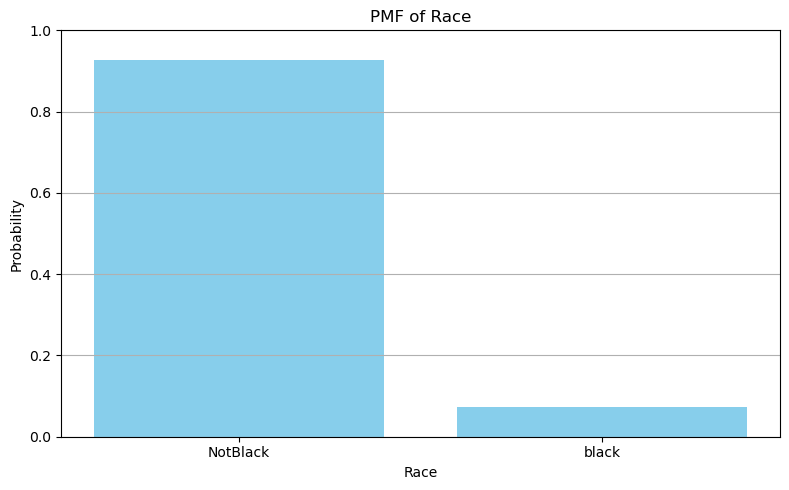

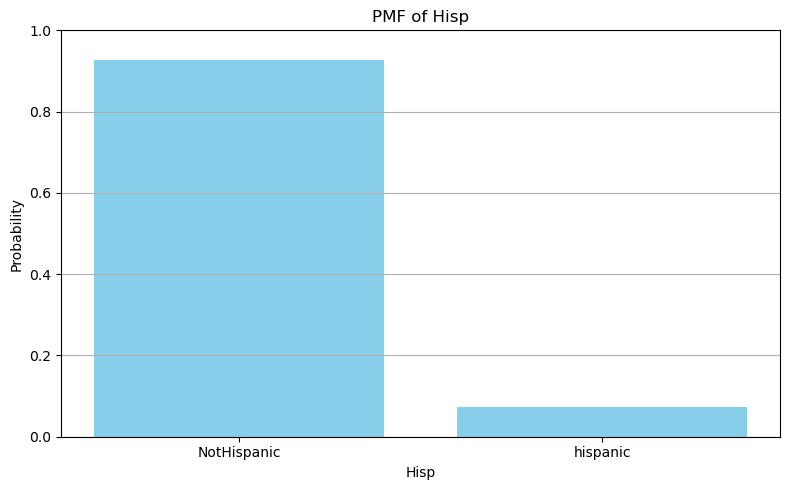

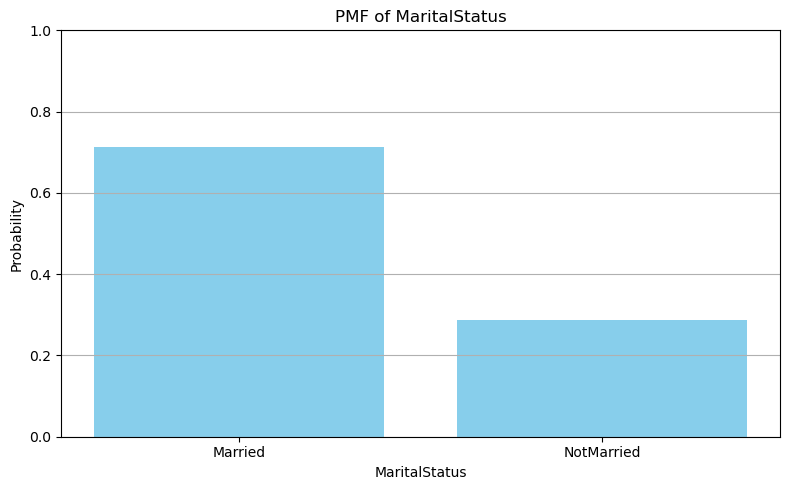

In [25]:
# Calc PMF
columns = ['Race', 'Hisp', 'MaritalStatus']
pmf_dict = {}
for column in columns:
    pmf = df[column].value_counts(normalize=True).to_dict()
    pmf_dict[column] = pmf

for column, pmf in pmf_dict.items():
    plt.figure(figsize=(8, 5))
    plt.bar(pmf.keys(), pmf.values(), color='skyblue')
    plt.title(f'PMF of {column}')
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()



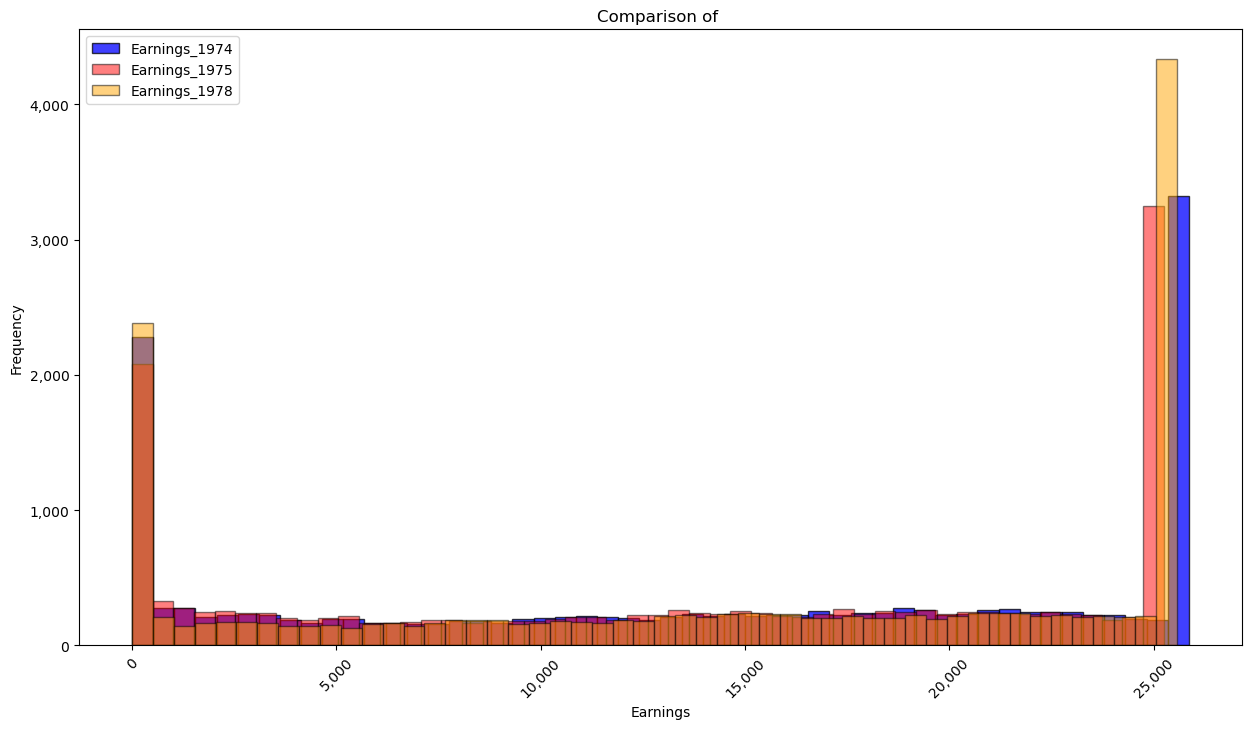

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot histograms overlaid
ax.hist(df['Earnings_1974'], bins=50, alpha=0.75, label='Earnings_1974', color='blue', edgecolor='black')    # Note: alpha=0.5 makes the bars semi
ax.hist(df['Earnings_1975'], bins=50, alpha=0.5, label='Earnings_1975', color='red', edgecolor='black')
ax.hist(df['Earnings_1978'], bins=50, alpha=0.5, label='Earnings_1978', color='orange', edgecolor='black')

ax.set_title('Comparison of ')
ax.set_xlabel('Earnings')
ax.set_ylabel('Frequency')
ax.legend()
plt.xticks(rotation=45)

formatter = tk.StrMethodFormatter('{x:,.0f}')  # Format as an integer with comma
ax.xaxis.set_major_formatter(formatter)                                  
ax.yaxis.set_major_formatter(formatter)

plt.show()